<a href="https://colab.research.google.com/github/JuanCervigon/Master/blob/main/122_Cluster_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cluster K-means

En este cuaderno desarrollamos un ejemplo de análsis cluster K-means con un dataset simulado

Utilizaremos la librería ´sklearn´

# Importar librerías y generar los datos

Generamos un conjunto de datos que previamente está clasificado en tres clusters.

El algoritmo de K-means no utiliza la clasificación. No obstante hacemos esa clasificación inicial para analizar si el algoritmo es capaz de reproducir dicha clasificación.


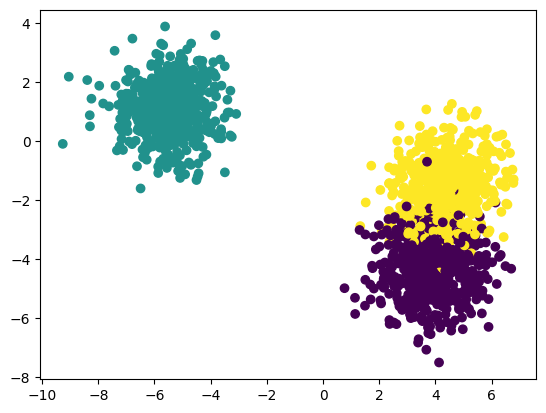

In [ ]:
# importar las librerías

import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generar 1500 datos datos alrededor de tres centros
# Conservamos el centro al que pertenece cada observación en la varariable y

X, y = make_blobs(n_samples=1500, centers=3, random_state=123)

# Hacer un gráfico de los puntos
plt.scatter(X[:, 0], X[:, 1], c=y);




## Algunos trucos para manipular arrays

In [ ]:
# imprimir las 5 primeras observaciones
X[:4,:],y[:4]

(array([[ 5.47792844, -0.94994834],
        [-5.96053971,  1.2814729 ],
        [-5.79956265, -0.69959462],
        [-5.57897132,  2.03978833]]),
 array([2, 1, 1, 1]))

In [ ]:
# Crear un array con las tres variables
# Para usar la función np.stack, los arrays deben tener la misma dimensión
# np.stack((X,y),axis=1) no funciona: X,y no tienen la misma dimensión
# pero X[:,0],X[:,1],y tienen la misma dimensión
np.stack((X[:,0],X[:,1],y),axis=1)

array([[ 5.47792844, -0.94994834,  2.        ],
       [-5.96053971,  1.2814729 ,  1.        ],
       [-5.79956265, -0.69959462,  1.        ],
       ...,
       [ 3.92325375, -4.43645851,  0.        ],
       [ 3.4701481 , -2.89968196,  2.        ],
       [ 4.14552429, -0.93533323,  2.        ]])

In [ ]:
np.shape(np.stack((X[:,0],X[:,1],y),axis=1))

(1500, 3)

In [ ]:
np.shape(X)

(1500, 2)

# Aplicar el algoritmo K-Means

Aplicamos el algoritmo K-means al dataset generado anteriormente.

El parámetro k = número de clusters lo decide el analista (es decir, lo decidimos nosotros). En principio, podemos anticipar que k=3 será el más adecuado ya que hemos generado el data set alrededor de tres centros tal y como se puede observar en el gráfico anterior.



In [ ]:
# Importar el módulo KMeans de sklearn
from sklearn.cluster import KMeans

# Instanciar el modelo y ajustar los datos
kmeans=KMeans(n_clusters=3)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
# Obtener los centroides
kmeans.cluster_centers_

array([[-5.47388078,  1.05172347],
       [ 3.85482714, -4.36708309],
       [ 4.43318562, -1.42928805]])

In [ ]:
# Obtener los clusters
kmeans.labels_

array([2, 0, 0, ..., 1, 1, 2], dtype=int32)

In [ ]:
# Obtener la primera observación y comprobar que está cerca de su centroide
X[0]

array([ 5.47792844, -0.94994834])

# Hacer gráficos K=2, 3, 4 y 5

Probamos diferentes valores de K para para comparar los resultados.

Generamos cuatro gráfico con K=2, 3, 4 y 5.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


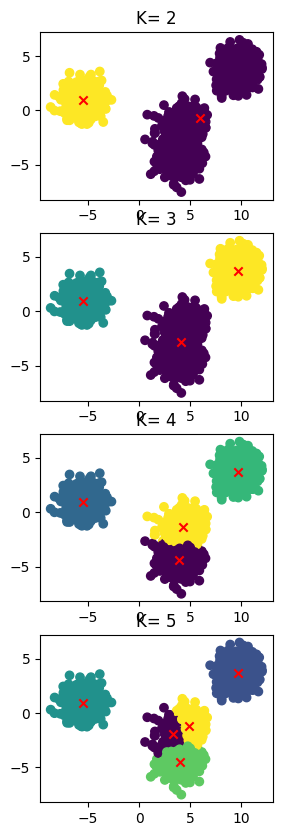

In [ ]:
# Hacer cuatro gráficos

fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(3, 10))

for i in range(0,4):

    kmeans = KMeans(n_clusters=i+2).fit(X)
    clt=kmeans.labels_
    ctr=kmeans.cluster_centers_
    axs[i].scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
    axs[i].scatter(ctr[:, 0], ctr[:, 1], marker="x", color="red")
    axs[i].set_title(f"K= {i+2}")


# Gráfico de decantación o scree plot

Para determinar el número de clusters podemos apoyarnos en la inercia

La inercia es la suma de las desviaciones de las distancias de las observaciones a su centroide al cuadrado

Cuando se aplica el análsis cluster, el objetivo es disminur la inercia del dataset resultante manteniendo el menor número de clusters posible


$inercia=\sum_id(x_i,x_{ci})^2$


Podemos construir una función para calcular la inercia en función del número de clusters, es decir, determinar la inercia con K=1, con K=2, etc.

A medida que incrementamos el número de clusters, disminuye la inercia. Cada vez que añadimos un cluster adicional la inercia disminuye menos. Podemos hacer un Scree Plot (o gráfico de sedimentación) y observar el "codo", es decir, el número de clusters a partir del cual la inercia no disminuye significativamente

En el eje horizontal se refleja el número de clusters y en el eje vertical la inercia del dataset.

Lógicamente, si el número de clusters es igual al número de observaciones,  K=n, la inercia total será cero, ya que la inercia de cada cluster es igual a cero. Por otra parte si hacemos un único cluster, K=1, la inercia será máxima. Por lo tanto el gráfico de decantación es una curva descendente a medida que se incrementa el númer de clusters

El analista debe decidir, en función del contexto, el número de clusters. Con carácter general se puede aplicar la "regla del codo" que descarta añadir más clusters cuando la inercia deja de disminur significativamente



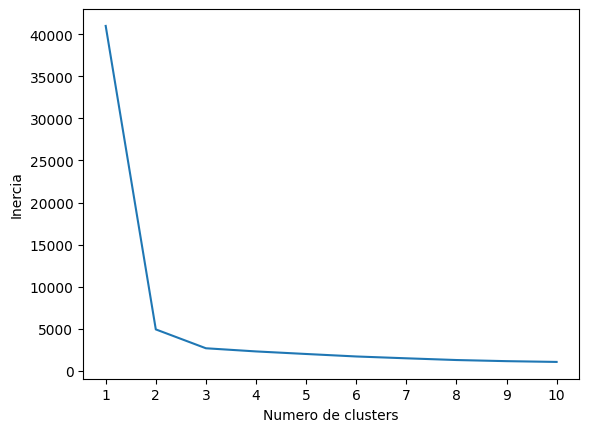

In [ ]:
# Ahora introducimos parámetros en KMeans() usando un diccionario
# No es necesario introducir parámetros, KMeans asume parámetros por defecto

params = {"init": "random","n_init": 10,"max_iter": 300,"random_state": 42,}

# Creamos una lista con la inercia para cada valor de K
inercia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **params)
    kmeans.fit(X)
    inercia.append(kmeans.inertia_)

# Gráfico de la inercia en función del número de clusters

plt.plot(range(1, 11), inercia)
plt.xticks(range(1, 11))
plt.xlabel("Numero de clusters")
plt.ylabel("Inercia")
plt.show()